In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [4]:
data_dir = "C:\\Users\\SRIHARIHARAKUMAR\\MSTAT-45\\4MSTAT\\Neural Networks and Deep Learning\\CNN_reallife"

In [6]:
img_size = (128, 128)
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 74 images belonging to 3 classes.


Found 17 images belonging to 3 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


C:\Users\SRIHARIHARAKUMAR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

C:\Users\SRIHARIHARAKUMAR\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2974 - loss: 1.2235 - val_accuracy: 0.2941 - val_loss: 1.0828
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3780 - loss: 1.0772 - val_accuracy: 0.7059 - val_loss: 1.0340
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4889 - loss: 1.0468 - val_accuracy: 0.4118 - val_loss: 0.9673
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5937 - loss: 0.9696 - val_accuracy: 0.6471 - val_loss: 0.9050
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6866 - loss: 0.8426 - val_accuracy: 0.6471 - val_loss: 0.7429
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7499 - loss: 0.6353 - val_accuracy: 0.7059 - val_loss: 0.6028
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7725 - loss: 0.5462 - val_accuracy: 0.6471 - val_loss: 0.7450
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8659 - loss: 0.4471 - val_accuracy: 0.8235 - val_loss: 0.5106
Epoch 9/20
5/5 

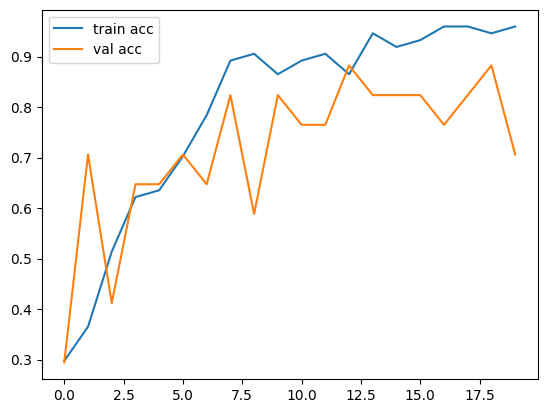

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8199 - loss: 1.8449
Validation Accuracy: 82.35%


In [9]:
# Accuracy & loss curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate on validation
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")


In [12]:
img_path = "C:\\Users\\SRIHARIHARAKUMAR\\Downloads\\1715069056764-8.jpg"   # put the real filename

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)
class_labels = list(train_data.class_indices.keys())
print("Predicted Class:", class_labels[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Class: Sneakers


In [11]:
model.save("shoe_classifier.h5")